In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

# Handwritten digits classification using neural network

In [3]:
#Loading hand written digits dataset from keras library.
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]
#in o/p: 0 means black and 255 means white. In-between values are shades between black and white.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

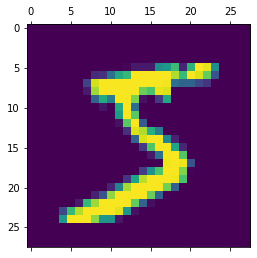

In [9]:
plt.matshow(X_train[0])

In [10]:
y_train[0]
#o/p for X_train[0] is 5. Just above is picture of X_train[0] and above that is matrix form of X_train[0].

5

In [81]:
#Pre-processing: Scaling our i/p values for better accuracy
X_train = X_train / 255
X_test = X_test / 255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
#Before flattening
#60000 is no. of images in training dataset and 28*28 is shape of each image.
X_train.shape

(60000, 28, 28)

In [14]:
#Flattening 2D array into 1D array
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [15]:
#After flattening
X_train_flattened.shape

(60000, 784)

## Neural network with no hidden layers

In [16]:
#sequential means there is going to be a stack of layers in neural network
#layers.Dense  means each neuron of 1st layer is connected with all neurons of 2nd layer
#10 is no. of neurons we want in o/p
#epochs is no. iterations for which neural network will run the training
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])    #Optimizer,loss,metrics are called hyper-parameters, they control parameters
                                       #Weights and bias are called parameters, they are affected by hyper-parameters
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4880 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3064 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2851 - accuracy: 0.9218
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2750 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2678 - accuracy: 0.9261


In [17]:
model.evaluate(X_test_flattened, y_test)
#o/p: 92.65% accurate

313/313 [==============================] - 0s 1ms/step - loss: 0.2661 - accuracy: 0.9266


[0.26610755920410156, 0.9265999794006348]

### Checking model  manually

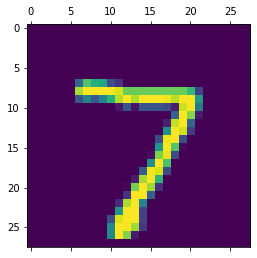

In [18]:
plt.matshow(X_test[0])
#X_test[0] is 7. Therefore Y_test[0] should give o/p as 7.

In [19]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.08679415e-05, 1.09955392e-10, 3.42915700e-05, 6.58652186e-03,
       1.24989970e-06, 7.25329664e-05, 7.28497318e-10, 7.34150350e-01,
       5.74940968e-05, 6.34282827e-04], dtype=float32)

**np.argmax finds a maximum o/p value from an array and returns the index of it**

In [20]:
np.argmax(y_predicted[0])

7

### Creating confusion matrix

In [21]:
#Didn't understand the reason behind doing this
#What i understood is: y_predicted was giving o/p in numbers which were in multiple of e to the power something (refer 2 lines above, y_predicted[0]), and now we are converting y_predicted's o/p in integers. But why? Ik that we need y_predicted's o/p in integer for confusion matrix. But idk why do we need only integers for confusion matrix?
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:4]

[7, 2, 1, 0]

In [22]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    2,    2,    0,    6,    9,    3,    3,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   3,    9,  927,   14,    7,    5,   12,   10,   41,    4],
       [   3,    1,   22,  901,    0,   37,    2,   13,   24,    7],
       [   1,    1,    4,    1,  915,    0,   11,    4,    9,   36],
       [   8,    3,    3,   20,    8,  795,   13,    5,   30,    7],
       [   7,    3,    6,    1,    7,   13,  916,    2,    3,    0],
       [   1,    7,   25,    2,    8,    1,    0,  951,    1,   32],
       [   5,   12,    5,   16,    9,   26,    8,   11,  877,    5],
       [   9,    8,    2,    9,   30,    6,    0,   23,   11,  911]])>

Text(69.0, 0.5, 'Truth')

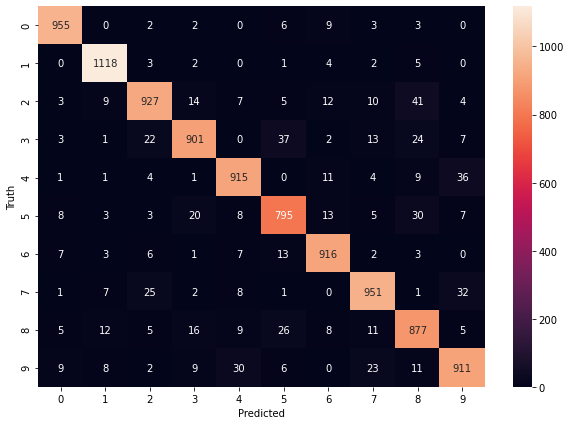

In [23]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

##  Using hidden layer

In [24]:
#100 is no. of neurons we want in hidden layer. We get this number by trail and error.
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),     #inner layer/first layer
    keras.layers.Dense(10, activation='sigmoid')                        #outer layer/last layer
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #For discrete values, we use sparse_categorical_crossentropy.
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3043 - accuracy: 0.9152
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1474 - accuracy: 0.9569
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1061 - accuracy: 0.9686
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0843 - accuracy: 0.9744
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0686 - accuracy: 0.9792


In [25]:
#o/p: 97.49% accurate
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0848 - accuracy: 0.9749


[0.0848241001367569, 0.9749000072479248]

Text(69.0, 0.5, 'Truth')

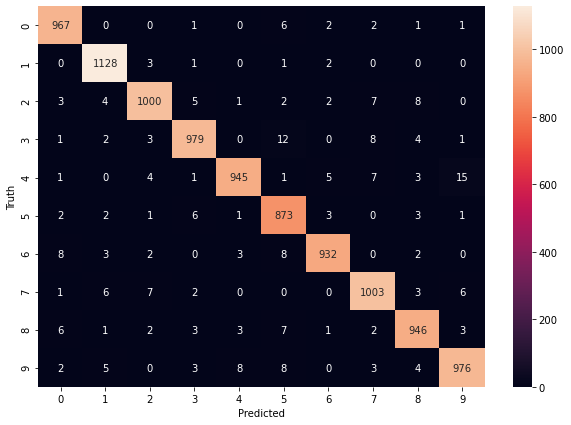

In [26]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using Flatten layer

Using Flatten layer so that we don't have to call .reshape on input dataset

In [27]:
#1st layer will be for flattening & in 2nd layer we don't need to specify the shape of i/p.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2911 - accuracy: 0.9183
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1347 - accuracy: 0.9603
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0983 - accuracy: 0.9715
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0762 - accuracy: 0.9769
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0619 - accuracy: 0.9810
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0523 - accuracy: 0.9842
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0426 - accuracy: 0.9869
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0364 - accuracy: 0.9887
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0303 - accuracy: 0.9906
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.027

In [28]:
#o/p: 97.82% accurate
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.0827 - accuracy: 0.9782


[0.0826985314488411, 0.9782000184059143]

# Activation Fn

We need to calculate derivatives and back propogate our errors. So when derivatives are closing zero, then learning becomes extremely slow. This is called Vanishing Gradient problem. Sigmoid and Tanh fn suffer from this problem.

For hidden layers, if we are not sure about choosing a activation fn, then go for ReLU fn. </p>
<p>ReLU also suffer from Vanishing Gradient problem. To get away with that problem, we use Leaky ReLU. </p>
For ReLU:  i/p=+ve, then o/p=1 and i/p=-ve, then o/p=0.For Leaky ReLU: i/p=+ve, then o/p=same as i/p, i/p=-ve, then o/p=0.1*i/p

In [29]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [30]:
sigmoid(100)

1.0

In [31]:
sigmoid(1)

0.7310585786300049

In [32]:
sigmoid(-56)

4.780892883885469e-25

In [33]:
sigmoid(0.5)

0.6224593312018546

In [34]:
def tanh(x):
  return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

In [35]:
tanh(-56)

-1.0

In [36]:
tanh(50)

1.0

In [37]:
tanh(1)

0.7615941559557649

In [38]:
def relu(x):
    return max(0,x)

In [39]:
relu(-100)

0

In [40]:
relu(8)

8

In [41]:
def leaky_relu(x):
    return max(0.1*x,x)

In [42]:
leaky_relu(-100)

-10.0

In [43]:
leaky_relu(8)

8

# Matrix

In [44]:
price_per_unit = np.array([1000,400,1200])
units = np.array([[30,40,50],[5,10,15],[2,5,7]])

In [45]:
price_per_unit*units

array([[30000, 16000, 60000],
       [ 5000,  4000, 18000],
       [ 2000,  2000,  8400]])

In above case numpy is using broadcasting matlab ki 1 hi row se 3 bhi columns ko multiple kr deta hai(1st row multiplied by 1st column, 1st row multiplied by 2nd column, 1st row multiplied by 3rd column). In dot product, it gives sum of (multiplication of 1st row with 1st column, 2nd row multiplied by 2nd column and likewise)

In [46]:
np.dot(price_per_unit,units)

array([34400, 50000, 64400])

# Loss or Cost Fn

In [47]:
y_predicted = np.array([1,1,0,0,1])
y_true = np.array([0.30,0.7,1,0,0.5])

## Mean Absolute Error

In [51]:
#Fn for calculating MAE. (Useless method)
def mae(y_predicted, y_true):
    total_error = 0
    for yp, yt in zip(y_predicted, y_true):    #Zip fn for running 'for loop' parallely in 2 arrays.
        total_error += abs(yp - yt)            #abs fn for calculating absolute difference, += is used for calculating 'sum of'
    print("Total error is:",total_error)
    mae = total_error/len(y_predicted)
    print("Mean absolute error is:",mae)
    return mae

In [49]:
mae(y_predicted, y_true)

Total error is: 2.5
Mean absolute error is: 0.5


0.5

### Implement same thing using numpy in much easier way

In [50]:
np.abs(y_predicted-y_true)

array([0.7, 0.3, 1. , 0. , 0.5])

In [52]:
np.mean(np.abs(y_predicted-y_true))

0.5

In [53]:
def mae_np(y_predicted, y_true):
    return np.mean(np.abs(y_predicted-y_true))

In [54]:
mae_np(y_predicted, y_true)

0.5

## Log Loss or Binary Cross Entropy

For logistic regression, we use log loss. Why? Because, unlike log loss, MSE doesn’t strongly penalize misclassifications even for the perfect mismatch. </p>
https://towardsdatascience.com/why-not-mse-as-a-loss-function-for-logistic-regression-589816b5e03c#:~:text=In%20the%20below%20image%20f,obtained%20after%20applying%20sigmoid%20function.&text=From%20the%20above%20equation%2C%20%C5%B7,between%20%5B0%2C%201%5D.&text=Hence%2C%20based%20on%20the%20convexity,non%2Dconvex%20and%20not%20recommended.

In [65]:
np.log([0])

<ipython-input-65-faee82fd9f21>:1: RuntimeWarning: divide by zero encountered in log
  np.log([0])


array([-inf])

In [56]:
#Since log0 is -infinity, we will replace it with value, epsilon, which tends to zero but not equal to zero
epsilon = 1e-15

In [57]:
np.log([1e-15])

array([-34.53877639])

In [58]:
y_predicted

array([1, 1, 0, 0, 1])

In [59]:
#For replacing zeros
y_predicted_new = [max(i,epsilon) for i in y_predicted]
y_predicted_new

[1, 1, 1e-15, 1e-15, 1]

In [60]:
1-epsilon

0.999999999999999

In [66]:
#For replacing ones, coz log(1) is zero.
y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
y_predicted_new

[0.999999999999999, 0.999999999999999, 1e-15, 1e-15, 0.999999999999999]

In [62]:
y_predicted_new = np.array(y_predicted_new)

In [63]:
np.log(y_predicted_new)

array([-9.99200722e-16, -9.99200722e-16, -3.45387764e+01, -3.45387764e+01,
       -9.99200722e-16])

In [70]:
-np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

TypeError: unsupported operand type(s) for -: 'int' and 'list'

In [73]:
#Writing Fn without using numpy
def log_loss(y_true, y_predicted):
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

In [72]:
log_loss(y_true, y_predicted)

17.2696280766844

# Gradient Descent for Neural network

GD is heart of supervised machine learning. Most frequently asked in interviews.

In [77]:
df = pd.read_csv('S:/Coding/Codebasics/DeepLearningML/6_gradient_descent/insurance_data.csv')
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df['bought_insurance'],test_size=0.2, random_state=25)

**Preprocessing: Scale the data so that both age and affordibility are in same scaling range**

In [86]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age']/100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age']/100

**Model Building: First we wil build a model using keras/tensorflow and see what weights and bias values it gives us. We will then try to reproduce same weights and bias in our plain python implementation of gradient descent. Below is the architecture of our simple neural network**

<img src="S:\Coding\Codebasics\DeepLearningML\6_gradient_descent\nn.png" height=800 width=800/>

## Building Neural Network using Tensorflow

In [87]:
#Creating sequential model with only 1 layer
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',   #AKA log loss and we always use log loss for logistic regression.
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.7113 - accuracy: 0.5000
Epoch 2/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.7110 - accuracy: 0.5000
Epoch 3/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.7106 - accuracy: 0.5000
Epoch 4/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.7102 - accuracy: 0.5000
Epoch 5/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.7098 - accuracy: 0.5000
Epoch 6/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.7094 - accuracy: 0.5000
Epoch 7/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.7091 - accuracy: 0.5000
Epoch 8/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.7087 - accuracy: 0.5000
Epoch 9/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.7083 - accuracy: 0.5000
Epoch 10/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.7079 - accuracy: 0.5000
Epoch 11/5000
1/1 [

1/1 [==============================] - 0s 3ms/step - loss: 0.6626 - accuracy: 0.5000
Epoch 166/5000
1/1 [==============================] - 0s 999us/step - loss: 0.6624 - accuracy: 0.5000
Epoch 167/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6622 - accuracy: 0.5000
Epoch 168/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6620 - accuracy: 0.5000
Epoch 169/5000
1/1 [==============================] - 0s 998us/step - loss: 0.6617 - accuracy: 0.5000
Epoch 170/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.5000
Epoch 171/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.5000
Epoch 172/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.6611 - accuracy: 0.5000
Epoch 173/5000
1/1 [==============================] - 0s 998us/step - loss: 0.6609 - accuracy: 0.5455
Epoch 174/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6607 - accuracy: 0.5455
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.6380 - accuracy: 0.6364
Epoch 328/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6379 - accuracy: 0.6364
Epoch 329/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6378 - accuracy: 0.6364
Epoch 330/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6377 - accuracy: 0.6364
Epoch 331/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6376 - accuracy: 0.6364
Epoch 332/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0.6364
Epoch 333/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6374 - accuracy: 0.6364
Epoch 334/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6373 - accuracy: 0.6364
Epoch 335/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6372 - accuracy: 0.6364
Epoch 336/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6371 - accuracy: 0.6364
Epoch 337/5000


Epoch 409/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6310 - accuracy: 0.6364
Epoch 410/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6309 - accuracy: 0.6364
Epoch 411/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6309 - accuracy: 0.6364
Epoch 412/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6308 - accuracy: 0.6364
Epoch 413/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6307 - accuracy: 0.6364
Epoch 414/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6307 - accuracy: 0.6364
Epoch 415/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6306 - accuracy: 0.6364
Epoch 416/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6305 - accuracy: 0.6364
Epoch 417/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6305 - accuracy: 0.6364
Epoch 418/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6304 - accuracy: 0.6364


1/1 [==============================] - 0s 3ms/step - loss: 0.6216 - accuracy: 0.6818
Epoch 573/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6215 - accuracy: 0.6818
Epoch 574/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6215 - accuracy: 0.6818
Epoch 575/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6214 - accuracy: 0.6818
Epoch 576/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6214 - accuracy: 0.6818
Epoch 577/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6213 - accuracy: 0.6818
Epoch 578/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6213 - accuracy: 0.6818
Epoch 579/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6212 - accuracy: 0.6818
Epoch 580/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6212 - accuracy: 0.6818
Epoch 581/5000
1/1 [==============================] - 0s 999us/step - loss: 0.6211 - accuracy: 0.6818
Epoch 582/500

1/1 [==============================] - 0s 2ms/step - loss: 0.6176 - accuracy: 0.7273
Epoch 655/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6175 - accuracy: 0.7273
Epoch 656/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.6175 - accuracy: 0.7273
Epoch 657/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6174 - accuracy: 0.7273
Epoch 658/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6174 - accuracy: 0.7273
Epoch 659/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6173 - accuracy: 0.7273
Epoch 660/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.6173 - accuracy: 0.7273
Epoch 661/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.7273
Epoch 662/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.7273
Epoch 663/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6171 - accuracy: 0.7273
Epoch 664/5000


Epoch 736/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6136 - accuracy: 0.7273
Epoch 737/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6136 - accuracy: 0.7273
Epoch 738/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6135 - accuracy: 0.7273
Epoch 739/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6135 - accuracy: 0.7273
Epoch 740/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6134 - accuracy: 0.7273
Epoch 741/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6134 - accuracy: 0.7273
Epoch 742/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6133 - accuracy: 0.7273
Epoch 743/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6133 - accuracy: 0.7273
Epoch 744/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6132 - accuracy: 0.7273
Epoch 745/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6132 - accuracy: 0.7273


Epoch 899/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6056 - accuracy: 0.6818
Epoch 900/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6056 - accuracy: 0.6818
Epoch 901/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6055 - accuracy: 0.6818
Epoch 902/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.6055 - accuracy: 0.6818
Epoch 903/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6054 - accuracy: 0.6818
Epoch 904/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6054 - accuracy: 0.6818
Epoch 905/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.6053 - accuracy: 0.6818
Epoch 906/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6053 - accuracy: 0.6818
Epoch 907/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.6052 - accuracy: 0.6818
Epoch 908/5000
1/1 [==============================] - 0s 999us/step - loss: 0.6052 - accuracy: 0.681

1/1 [==============================] - 0s 4ms/step - loss: 0.5976 - accuracy: 0.6818
Epoch 1062/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5975 - accuracy: 0.6818
Epoch 1063/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5975 - accuracy: 0.6818
Epoch 1064/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5974 - accuracy: 0.6818
Epoch 1065/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5974 - accuracy: 0.6818
Epoch 1066/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5973 - accuracy: 0.6818
Epoch 1067/5000
1/1 [==============================] - 0s 998us/step - loss: 0.5973 - accuracy: 0.6818
Epoch 1068/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5972 - accuracy: 0.6818
Epoch 1069/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5972 - accuracy: 0.6818
Epoch 1070/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5971 - accuracy: 0.6818
Epoc

1/1 [==============================] - 0s 4ms/step - loss: 0.5935 - accuracy: 0.6818
Epoch 1143/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5935 - accuracy: 0.6818
Epoch 1144/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5934 - accuracy: 0.6818
Epoch 1145/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5934 - accuracy: 0.6818
Epoch 1146/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5933 - accuracy: 0.6818
Epoch 1147/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5933 - accuracy: 0.6818
Epoch 1148/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5932 - accuracy: 0.6818
Epoch 1149/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5932 - accuracy: 0.6818
Epoch 1150/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5931 - accuracy: 0.6818
Epoch 1151/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5931 - accuracy: 0.6818
Epoch 

1/1 [==============================] - 0s 999us/step - loss: 0.5855 - accuracy: 0.6818
Epoch 1304/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5855 - accuracy: 0.6818
Epoch 1305/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5854 - accuracy: 0.6818
Epoch 1306/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5854 - accuracy: 0.6818
Epoch 1307/5000
1/1 [==============================] - 0s 998us/step - loss: 0.5853 - accuracy: 0.6818
Epoch 1308/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5853 - accuracy: 0.6818
Epoch 1309/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5852 - accuracy: 0.6818
Epoch 1310/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5852 - accuracy: 0.6818
Epoch 1311/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5851 - accuracy: 0.6818
Epoch 1312/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5851 - accuracy: 0.6818
Ep

1/1 [==============================] - 0s 2ms/step - loss: 0.5815 - accuracy: 0.6818
Epoch 1385/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5815 - accuracy: 0.6818
Epoch 1386/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5814 - accuracy: 0.6818
Epoch 1387/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5814 - accuracy: 0.6818
Epoch 1388/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.6818
Epoch 1389/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5813 - accuracy: 0.6818
Epoch 1390/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5812 - accuracy: 0.6818
Epoch 1391/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5812 - accuracy: 0.6818
Epoch 1392/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5812 - accuracy: 0.6818
Epoch 1393/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5811 - accuracy: 0.6818
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.5776 - accuracy: 0.6818
Epoch 1466/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5775 - accuracy: 0.6818
Epoch 1467/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5775 - accuracy: 0.6818
Epoch 1468/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5774 - accuracy: 0.6818
Epoch 1469/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5774 - accuracy: 0.6818
Epoch 1470/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.6818
Epoch 1471/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.6818
Epoch 1472/5000
1/1 [==============================] - 0s 999us/step - loss: 0.5773 - accuracy: 0.6818
Epoch 1473/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.6818
Epoch 1474/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.6818
Epoc

1/1 [==============================] - 0s 3ms/step - loss: 0.5699 - accuracy: 0.6818
Epoch 1627/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5698 - accuracy: 0.6818
Epoch 1628/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5698 - accuracy: 0.6818
Epoch 1629/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5697 - accuracy: 0.6818
Epoch 1630/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5697 - accuracy: 0.6818
Epoch 1631/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5696 - accuracy: 0.6818
Epoch 1632/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5696 - accuracy: 0.6818
Epoch 1633/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5695 - accuracy: 0.6818
Epoch 1634/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5695 - accuracy: 0.6818
Epoch 1635/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.6818
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.5624 - accuracy: 0.6818
Epoch 1788/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5623 - accuracy: 0.6818
Epoch 1789/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5623 - accuracy: 0.6818
Epoch 1790/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5622 - accuracy: 0.6818
Epoch 1791/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5622 - accuracy: 0.6818
Epoch 1792/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5621 - accuracy: 0.6818
Epoch 1793/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5621 - accuracy: 0.6818
Epoch 1794/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5620 - accuracy: 0.6818
Epoch 1795/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5620 - accuracy: 0.6818
Epoch 1796/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5619 - accuracy: 0.6818
Epoch 

Epoch 1949/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5551 - accuracy: 0.6818
Epoch 1950/5000
1/1 [==============================] - 0s 999us/step - loss: 0.5550 - accuracy: 0.6818
Epoch 1951/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5550 - accuracy: 0.6818
Epoch 1952/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5549 - accuracy: 0.6818
Epoch 1953/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5549 - accuracy: 0.6818
Epoch 1954/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5548 - accuracy: 0.6818
Epoch 1955/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5548 - accuracy: 0.6818
Epoch 1956/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5547 - accuracy: 0.6818
Epoch 1957/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5547 - accuracy: 0.6818
Epoch 1958/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5547 - accur

1/1 [==============================] - 0s 3ms/step - loss: 0.5515 - accuracy: 0.6818
Epoch 2031/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5514 - accuracy: 0.6818
Epoch 2032/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5514 - accuracy: 0.6818
Epoch 2033/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5514 - accuracy: 0.6818
Epoch 2034/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5513 - accuracy: 0.6818
Epoch 2035/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5513 - accuracy: 0.6818
Epoch 2036/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5512 - accuracy: 0.6818
Epoch 2037/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5512 - accuracy: 0.6818
Epoch 2038/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5511 - accuracy: 0.6818
Epoch 2039/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5511 - accuracy: 0.6818
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.5446 - accuracy: 0.6818
Epoch 2193/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5445 - accuracy: 0.6818
Epoch 2194/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5445 - accuracy: 0.6818
Epoch 2195/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5445 - accuracy: 0.6818
Epoch 2196/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5444 - accuracy: 0.6818
Epoch 2197/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5444 - accuracy: 0.6818
Epoch 2198/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5443 - accuracy: 0.6818
Epoch 2199/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5443 - accuracy: 0.6818
Epoch 2200/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5442 - accuracy: 0.6818
Epoch 2201/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5442 - accuracy: 0.6818
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.5379 - accuracy: 0.7273
Epoch 2355/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5379 - accuracy: 0.7273
Epoch 2356/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5379 - accuracy: 0.7273
Epoch 2357/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5378 - accuracy: 0.7273
Epoch 2358/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.5378 - accuracy: 0.7273
Epoch 2359/5000
1/1 [==============================] - 0s 999us/step - loss: 0.5377 - accuracy: 0.7273
Epoch 2360/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5377 - accuracy: 0.7273
Epoch 2361/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5377 - accuracy: 0.7273
Epoch 2362/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5376 - accuracy: 0.7273
Epoch 2363/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5376 - accuracy: 0.7273
E

1/1 [==============================] - 0s 2ms/step - loss: 0.5316 - accuracy: 0.7273
Epoch 2515/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5316 - accuracy: 0.7273
Epoch 2516/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5316 - accuracy: 0.7273
Epoch 2517/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5315 - accuracy: 0.7273
Epoch 2518/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5315 - accuracy: 0.7273
Epoch 2519/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5315 - accuracy: 0.7273
Epoch 2520/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5314 - accuracy: 0.7273
Epoch 2521/5000
1/1 [==============================] - 0s 999us/step - loss: 0.5314 - accuracy: 0.7273
Epoch 2522/5000
1/1 [==============================] - 0s 998us/step - loss: 0.5313 - accuracy: 0.7273
Epoch 2523/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5313 - accuracy: 0.7273
Ep

Epoch 2595/5000
1/1 [==============================] - 0s 999us/step - loss: 0.5286 - accuracy: 0.7273
Epoch 2596/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5285 - accuracy: 0.7273
Epoch 2597/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5285 - accuracy: 0.7273
Epoch 2598/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5285 - accuracy: 0.7273
Epoch 2599/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5284 - accuracy: 0.7273
Epoch 2600/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5284 - accuracy: 0.7273
Epoch 2601/5000
1/1 [==============================] - 0s 999us/step - loss: 0.5283 - accuracy: 0.7273
Epoch 2602/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5283 - accuracy: 0.7273
Epoch 2603/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5283 - accuracy: 0.7273
Epoch 2604/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5282 - acc

1/1 [==============================] - 0s 2ms/step - loss: 0.5227 - accuracy: 0.7727
Epoch 2756/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5226 - accuracy: 0.7727
Epoch 2757/5000
1/1 [==============================] - 0s 999us/step - loss: 0.5226 - accuracy: 0.7727
Epoch 2758/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5226 - accuracy: 0.7727
Epoch 2759/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5225 - accuracy: 0.7727
Epoch 2760/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5225 - accuracy: 0.7727
Epoch 2761/5000
1/1 [==============================] - 0s 998us/step - loss: 0.5225 - accuracy: 0.7727
Epoch 2762/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5224 - accuracy: 0.7727
Epoch 2763/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5224 - accuracy: 0.7727
Epoch 2764/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5224 - accuracy: 0.7727
Ep

Epoch 2916/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5170 - accuracy: 0.8182
Epoch 2917/5000
1/1 [==============================] - 0s 999us/step - loss: 0.5170 - accuracy: 0.8182
Epoch 2918/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.8182
Epoch 2919/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.8182
Epoch 2920/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5169 - accuracy: 0.8182
Epoch 2921/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5168 - accuracy: 0.8182
Epoch 2922/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5168 - accuracy: 0.8182
Epoch 2923/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5168 - accuracy: 0.8182
Epoch 2924/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5167 - accuracy: 0.8182
Epoch 2925/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5167 - accur

1/1 [==============================] - 0s 2ms/step - loss: 0.5143 - accuracy: 0.8636
Epoch 2998/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5142 - accuracy: 0.8636
Epoch 2999/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5142 - accuracy: 0.8636
Epoch 3000/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5142 - accuracy: 0.8636
Epoch 3001/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5141 - accuracy: 0.8636
Epoch 3002/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5141 - accuracy: 0.8636
Epoch 3003/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5141 - accuracy: 0.8636
Epoch 3004/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5140 - accuracy: 0.8636
Epoch 3005/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5140 - accuracy: 0.8636
Epoch 3006/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5140 - accuracy: 0.8636
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.5089 - accuracy: 0.8636
Epoch 3160/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5089 - accuracy: 0.8636
Epoch 3161/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5089 - accuracy: 0.8636
Epoch 3162/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5088 - accuracy: 0.8636
Epoch 3163/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5088 - accuracy: 0.8636
Epoch 3164/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5088 - accuracy: 0.8636
Epoch 3165/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5087 - accuracy: 0.8636
Epoch 3166/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5087 - accuracy: 0.8636
Epoch 3167/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5087 - accuracy: 0.8636
Epoch 3168/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5086 - accuracy: 0.8636
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.5039 - accuracy: 0.9091
Epoch 3321/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5038 - accuracy: 0.9091
Epoch 3322/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.5038 - accuracy: 0.9091
Epoch 3323/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5038 - accuracy: 0.9091
Epoch 3324/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5038 - accuracy: 0.9091
Epoch 3325/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5037 - accuracy: 0.9091
Epoch 3326/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5037 - accuracy: 0.9091
Epoch 3327/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5037 - accuracy: 0.9091
Epoch 3328/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5036 - accuracy: 0.9091
Epoch 3329/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5036 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.5014 - accuracy: 0.9091
Epoch 3402/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5014 - accuracy: 0.9091
Epoch 3403/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5014 - accuracy: 0.9091
Epoch 3404/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.9091
Epoch 3405/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.9091
Epoch 3406/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.9091
Epoch 3407/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5012 - accuracy: 0.9091
Epoch 3408/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5012 - accuracy: 0.9091
Epoch 3409/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5012 - accuracy: 0.9091
Epoch 3410/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5012 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.4967 - accuracy: 0.9091
Epoch 3563/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4967 - accuracy: 0.9091
Epoch 3564/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4967 - accuracy: 0.9091
Epoch 3565/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4966 - accuracy: 0.9091
Epoch 3566/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4966 - accuracy: 0.9091
Epoch 3567/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4966 - accuracy: 0.9091
Epoch 3568/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4965 - accuracy: 0.9091
Epoch 3569/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4965 - accuracy: 0.9091
Epoch 3570/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4965 - accuracy: 0.9091
Epoch 3571/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4965 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 999us/step - loss: 0.4922 - accuracy: 0.9091
Epoch 3724/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.4922 - accuracy: 0.9091
Epoch 3725/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4922 - accuracy: 0.9091
Epoch 3726/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.9091
Epoch 3727/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4921 - accuracy: 0.9091
Epoch 3728/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4921 - accuracy: 0.9091
Epoch 3729/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.9091
Epoch 3730/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.4920 - accuracy: 0.9091
Epoch 3731/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4920 - accuracy: 0.9091
Epoch 3732/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4920 - accuracy: 0.909

1/1 [==============================] - 0s 4ms/step - loss: 0.4900 - accuracy: 0.9091
Epoch 3805/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.9091
Epoch 3806/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4900 - accuracy: 0.9091
Epoch 3807/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4900 - accuracy: 0.9091
Epoch 3808/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.9091
Epoch 3809/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.9091
Epoch 3810/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.9091
Epoch 3811/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4898 - accuracy: 0.9091
Epoch 3812/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4898 - accuracy: 0.9091
Epoch 3813/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4898 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.9091
Epoch 3966/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.9091
Epoch 3967/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.4858 - accuracy: 0.9091
Epoch 3968/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.9091
Epoch 3969/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4857 - accuracy: 0.9091
Epoch 3970/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4857 - accuracy: 0.9091
Epoch 3971/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4857 - accuracy: 0.9091
Epoch 3972/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4857 - accuracy: 0.9091
Epoch 3973/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.4856 - accuracy: 0.9091
Epoch 3974/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.9091


1/1 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.9091
Epoch 4047/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.9091
Epoch 4048/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.9091
Epoch 4049/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.9091
Epoch 4050/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4837 - accuracy: 0.9091
Epoch 4051/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.9091
Epoch 4052/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.9091
Epoch 4053/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.9091
Epoch 4054/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.9091
Epoch 4055/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 3ms/step - loss: 0.4818 - accuracy: 0.9091
Epoch 4128/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.9091
Epoch 4129/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4818 - accuracy: 0.9091
Epoch 4130/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4817 - accuracy: 0.9091
Epoch 4131/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4817 - accuracy: 0.9091
Epoch 4132/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4817 - accuracy: 0.9091
Epoch 4133/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4817 - accuracy: 0.9091
Epoch 4134/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4816 - accuracy: 0.9091
Epoch 4135/5000
1/1 [==============================] - 0s 999us/step - loss: 0.4816 - accuracy: 0.9091
Epoch 4136/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4816 - accuracy: 0.9091
Epoc

1/1 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.9091
Epoch 4288/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.9091
Epoch 4289/5000
1/1 [==============================] - 0s 998us/step - loss: 0.4780 - accuracy: 0.9091
Epoch 4290/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4780 - accuracy: 0.9091
Epoch 4291/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.9091
Epoch 4292/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4779 - accuracy: 0.9091
Epoch 4293/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.9091
Epoch 4294/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.9091
Epoch 4295/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.9091
Epoch 4296/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4778 - accuracy: 0.9091
Epoc

1/1 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.9091
Epoch 4450/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4743 - accuracy: 0.9091
Epoch 4451/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.9091
Epoch 4452/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.9091
Epoch 4453/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.4743 - accuracy: 0.9091
Epoch 4454/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4742 - accuracy: 0.9091
Epoch 4455/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4742 - accuracy: 0.9091
Epoch 4456/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.9091
Epoch 4457/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4742 - accuracy: 0.9091
Epoch 4458/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4742 - accuracy: 0.9091
Epo

1/1 [==============================] - 0s 3ms/step - loss: 0.4726 - accuracy: 0.9091
Epoch 4531/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4726 - accuracy: 0.9091
Epoch 4532/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.9091
Epoch 4533/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4725 - accuracy: 0.9091
Epoch 4534/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4725 - accuracy: 0.9091
Epoch 4535/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4725 - accuracy: 0.9091
Epoch 4536/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.9091
Epoch 4537/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4724 - accuracy: 0.9091
Epoch 4538/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.9091
Epoch 4539/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4724 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 2ms/step - loss: 0.4692 - accuracy: 0.9091
Epoch 4692/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.4692 - accuracy: 0.9091
Epoch 4693/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4691 - accuracy: 0.9091
Epoch 4694/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.4691 - accuracy: 0.9091
Epoch 4695/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4691 - accuracy: 0.9091
Epoch 4696/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4691 - accuracy: 0.9091
Epoch 4697/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.4691 - accuracy: 0.9091
Epoch 4698/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.9091
Epoch 4699/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.9091
Epoch 4700/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.4659 - accuracy: 0.9091
Epoch 4853/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4659 - accuracy: 0.9091
Epoch 4854/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4659 - accuracy: 0.9091
Epoch 4855/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4659 - accuracy: 0.9091
Epoch 4856/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4659 - accuracy: 0.9091
Epoch 4857/5000
1/1 [==============================] - 0s 998us/step - loss: 0.4658 - accuracy: 0.9091
Epoch 4858/5000
1/1 [==============================] - 0s 999us/step - loss: 0.4658 - accuracy: 0.9091
Epoch 4859/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4658 - accuracy: 0.9091
Epoch 4860/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4658 - accuracy: 0.9091
Epoch 4861/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4658 - accuracy: 0.9091
Ep

1/1 [==============================] - 0s 1000us/step - loss: 0.4644 - accuracy: 0.9091
Epoch 4934/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4643 - accuracy: 0.9091
Epoch 4935/5000
1/1 [==============================] - 0s 1000us/step - loss: 0.4643 - accuracy: 0.9091
Epoch 4936/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4643 - accuracy: 0.9091
Epoch 4937/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4643 - accuracy: 0.9091
Epoch 4938/5000
1/1 [==============================] - 0s 1ms/step - loss: 0.4643 - accuracy: 0.9091
Epoch 4939/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.9091
Epoch 4940/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.9091
Epoch 4941/5000
1/1 [==============================] - 0s 999us/step - loss: 0.4642 - accuracy: 0.9091
Epoch 4942/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4642 - accuracy: 0.909

In [90]:
model.evaluate(X_test_scaled, y_test)
#o/p: 100% accurate

1/1 [==============================] - 0s 2ms/step - loss: 0.3550 - accuracy: 1.0000


[0.35497748851776123, 1.0]

**Checking Manually**

In [107]:
X_test_scaled[:7]

,age,affordibility
2,0.47,1
10,0.18,1
21,0.26,0
11,0.28,1
14,0.49,1
9,0.61,1


In [97]:
y_test[0:7]

2     1
10    0
21    0
11    0
14    1
9     1
Name: bought_insurance, dtype: int64

In [98]:
model.predict(X_test_scaled)
#If y_test's o/p is 1, model.predict's o/p should be >0.5

array([[0.7054848 ],
       [0.35569546],
       [0.16827846],
       [0.47801173],
       [0.7260697 ],
       [0.8294984 ]], dtype=float32)

**Now get the value of weights and bias from the model**

In [99]:
coef, intercept = model.get_weights()

In [100]:
coef, intercept

(array([[5.0608673],
        [1.4086503]], dtype=float32),
 array([-2.913703], dtype=float32))

**This means w1=5.060867, w2=1.4086502, bias =-2.9137027**

## Building Neural Network using python

In [101]:
def sigmoid(x):
        import math
        return 1 / (1 + math.exp(-x))
sigmoid(18)

0.9999999847700205

**Instead of using model.predict, we are writing our own prediction function that uses w1,w2 and bias**

In [103]:
def prediction_function(age, affordibility):
    weighted_sum = coef[0]*age + coef[1]*affordibility + intercept
    return sigmoid(weighted_sum)

In [109]:
#Let's predict for X_test_scaled[0:1] (ie age = 47, affordibility=1):
prediction_function(.47, 1)

0.705484819775958

**Now we start implementing gradient descent in plain python. Goal is to come up with same w1, w2 and bias that keras model calculated.**</p>
We did something like this in ML Gradient Discent tutorial as well. That one i understood, but this one is bouncer.

In [114]:
#'sigmoid fn for numpy' takes an array as input instead of just 1 value
def sigmoid_numpy(X):
   return 1/(1+np.exp(-X))

In [115]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

In interview if they ask to write code for Gradient Descent, then following code is the one.

**Following Gradient Descent fn is for neural network or simple logistic regression**

In [116]:
#Gradient Descent fn helps in finding out weights (ie W1,W2, bias)
def gradient_descent(age, affordability, y_true, epochs, loss_thresold):
    w1 = w2 = 1
    bias = 0
    rate = 0.5           #learning rate
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + bias      #Refer architecture: calculate y here, using x
        y_predicted = sigmoid_numpy(weighted_sum)                #Refer architecture: calculate z here, using y
        loss = log_loss(y_true, y_predicted)                     #Cost fn: Log loss

        
        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true))             #partial derive wrt w1
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true))   #partial derive wrt w2
        bias_d = np.mean(y_predicted-y_true)                                   #partial derive wrt bias
        
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss<=loss_thresold:
            break

    return w1, w2, bias

In [117]:
gradient_descent(X_train_scaled['age'],X_train_scaled['affordibility'],y_train,1000, 0.4631)

Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.11341867736368583, loss:0.7113403233723417
Epoch:1, w1:0.9556229728273669, w2:0.9058873696677865, bias:-0.2122349122718517, loss:0.681264778737757
Epoch:2, w1:0.9416488476693794, w2:0.8719790823960313, bias:-0.2977578997796538, loss:0.6591474252715025
Epoch:3, w1:0.9323916996249162, w2:0.8457541517722915, bias:-0.3715094724003511, loss:0.6431523291301917
Epoch:4, w1:0.9272267472726993, w2:0.8262362885332687, bias:-0.43506643026891584, loss:0.6316873063379158
Epoch:5, w1:0.9255469396815343, w2:0.8124402814952774, bias:-0.48994490058938817, loss:0.623471707997592
Epoch:6, w1:0.9267936114129968, w2:0.8034375029757677, bias:-0.5375299543522853, loss:0.6175321183044205
Epoch:7, w1:0.93047170420295, w2:0.7983920007454487, bias:-0.5790424270894963, loss:0.6131591858705934
Epoch:8, w1:0.9361540784567942, w2:0.7965748796787705, bias:-0.6155315088627655, loss:0.6098518179750948
Epoch:9, w1:0.9434791243557357, w2:0.7973647616854131, bia

Epoch:96, w1:2.1465190342258187, w2:1.2847830650067702, bias:-1.6311850367430925, loss:0.5410241435291299
Epoch:97, w1:2.1600972913844236, w2:1.2871906551145709, bias:-1.638624619627673, loss:0.5405310730102341
Epoch:98, w1:2.173655799855084, w2:1.2895551825993699, bias:-1.6460234079994696, loss:0.5400407225900913
Epoch:99, w1:2.1871944491052364, w2:1.2918774898345378, bias:-1.6533819823304428, loss:0.5395530569489538
Epoch:100, w1:2.200713131760032, w2:1.2941584023238903, bias:-1.6607009122062801, loss:0.5390680417774752
Epoch:101, w1:2.2142117435395288, w2:1.2963987290649803, bias:-1.667980756554761, loss:0.5385856437396539
Epoch:102, w1:2.227690183197251, w2:1.298599262903754, bias:-1.675222063868738, loss:0.5381058304372313
Epoch:103, w1:2.241148352460086, w2:1.300760780880796, bias:-1.6824253724238831, loss:0.5376285703754836
Epoch:104, w1:2.2545861559694704, w2:1.302884044569378, bias:-1.68959121049134, loss:0.5371538329303491
Epoch:105, w1:2.268003501223843, w2:1.304969800405522

Epoch:190, w1:3.328756333687456, w2:1.3990115960687382, bias:-2.2060712081216627, loss:0.5036490144685731
Epoch:191, w1:3.3402807830410546, w2:1.3995607383080155, bias:-2.211240197849864, loss:0.503328356061139
Epoch:192, w1:3.3517832990758714, w2:1.400103280657881, bias:-2.21639501767365, loss:0.5030090198493474
Epoch:193, w1:3.3632639071813597, w2:1.4006393595161428, bias:-2.221535783353378, loss:0.502690999049364
Epoch:194, w1:3.374722633217819, w2:1.401169108706148, bias:-2.2266626088856363, loss:0.502374286935055
Epoch:195, w1:3.38615950350589, w2:1.4016926595248012, bias:-2.231775606534763, loss:0.5020588768368214
Epoch:196, w1:3.397574544816239, w2:1.4022101407896574, bias:-2.236874886863771, loss:0.5017447621404708
Epoch:197, w1:3.4089677843594166, w2:1.4027216788851053, bias:-2.2419605587646827, loss:0.501431936286126
Epoch:198, w1:3.4203392497759024, w2:1.4032273978076621, bias:-2.247032729488292, loss:0.5011203927671694
Epoch:199, w1:3.4316889691263155, w2:1.4037274192103972

Epoch:290, w1:4.377969426975164, w2:1.435969295507928, bias:-2.666445126583578, loss:0.47719956204224745
Epoch:291, w1:4.387471965438258, w2:1.4362532822882104, bias:-2.6705745814726822, loss:0.47698407957802763
Epoch:292, w1:4.39695627708913, w2:1.4365367507620523, bias:-2.674696134161794, loss:0.47676942301302794
Epoch:293, w1:4.4064224029439885, w2:1.4368197195076966, bias:-2.67880981633286, loss:0.47655558865809444
Epoch:294, w1:4.4158703839976345, w2:1.437102206702417, bias:-2.6829156593457277, loss:0.4763425728427668
Epoch:295, w1:4.425300261221807, w2:1.4373842301299584, bias:-2.687013694243196, loss:0.476130371915163
Epoch:296, w1:4.4347120755635645, w2:1.437665807187842, bias:-2.6911039517559807, loss:0.47591898224186396
Epoch:297, w1:4.4441058679437, w2:1.4379469548945398, bias:-2.695186462307589, loss:0.4757084002078021
Epoch:298, w1:4.453481679255188, w2:1.438227689896519, bias:-2.6992612560191147, loss:0.47549862221614797
Epoch:299, w1:4.46283955036166, w2:1.43850802847516

(5.051047623653049, 1.4569794548473887, -2.9596534546250037)

In [118]:
coef, intercept

(array([[5.0608673],
        [1.4086503]], dtype=float32),
 array([-2.913703], dtype=float32))

Almost same as what tensorflow gave earlier.

## Custom Neural Network class

In [119]:
#class constructor:
class myNN:
    def __init__(self):
        self.w1 = 1 
        self.w2 = 1
        self.bias = 0
        
    def fit(self, X, y, epochs, loss_thresold):
        self.w1, self.w2, self.bias = self.gradient_descent(X['age'],X['affordibility'],y, epochs, loss_thresold)
        print(f"Final weights and bias: w1: {self.w1}, w2: {self.w2}, bias: {self.bias}")
        
    def predict(self, X_test):
        weighted_sum = self.w1*X_test['age'] + self.w2*X_test['affordibility'] + self.bias
        return sigmoid_numpy(weighted_sum)

    def gradient_descent(self, age,affordability, y_true, epochs, loss_thresold):
        w1 = w2 = 1
        bias = 0
        rate = 0.5
        n = len(age)
        for i in range(epochs):
            weighted_sum = w1 * age + w2 * affordability + bias
            y_predicted = sigmoid_numpy(weighted_sum)
            loss = log_loss(y_true, y_predicted)
            
            w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
            w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

            bias_d = np.mean(y_predicted-y_true)
            w1 = w1 - rate * w1d
            w2 = w2 - rate * w2d
            bias = bias - rate * bias_d
            
            if i%50==0:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
            
            if loss<=loss_thresold:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
                break

        return w1, w2, bias

In [120]:
customModel = myNN()
customModel.fit(X_train_scaled, y_train, epochs=8000, loss_thresold=0.4631)

Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.11341867736368583, loss:0.7113403233723417
Epoch:50, w1:1.503319554173139, w2:1.108384790367645, bias:-1.2319047301235464, loss:0.5675865113475955
Epoch:100, w1:2.200713131760032, w2:1.2941584023238903, bias:-1.6607009122062801, loss:0.5390680417774752
Epoch:150, w1:2.8495727769689085, w2:1.3696895491572747, bias:-1.986105845859897, loss:0.5176462164249294
Epoch:200, w1:3.443016970881804, w2:1.404221862446503, bias:-2.2571369883752723, loss:0.5005011269691375
Epoch:250, w1:3.982450494649577, w2:1.423912732932123, bias:-2.494377365971801, loss:0.48654089537617085
Epoch:300, w1:4.4721795220959155, w2:1.438787986553552, bias:-2.7073878119223735, loss:0.47508146406327934
Epoch:350, w1:4.917245868007634, w2:1.4525660781176122, bias:-2.901176333556766, loss:0.46561475306999006
Epoch:366, w1:5.051047623653049, w2:1.4569794548473887, bias:-2.9596534546250037, loss:0.46293944095888917
Final weights and bias: w1: 5.051047623653049, w2:

In [122]:
coef, intercept
#Almost similar as previous

(array([[5.0608673],
        [1.4086503]], dtype=float32),
 array([-2.913703], dtype=float32))

In [123]:
X_test_scaled

,age,affordibility
2,0.47,1
10,0.18,1
21,0.26,0
11,0.28,1
14,0.49,1
9,0.61,1


**(1) Predict using custom model**

In [124]:
customModel.predict(X_test_scaled)

2     0.705020
10    0.355836
21    0.161599
11    0.477919
14    0.725586
9     0.828987
dtype: float64

**(2) Predict using tensorflow model**

In [125]:
model.predict(X_test_scaled)

array([[0.7054848 ],
       [0.35569546],
       [0.16827846],
       [0.47801173],
       [0.7260697 ],
       [0.8294984 ]], dtype=float32)

# Stochastic GD v/s Batch GD v/s Mini batch GD

**Batch Gradient Descent:** In Batch GD, we  use all training samples in forward pass to calculate cumulitive error and then we adjust weights using derivaties. </p>
This is good for small training set.

**Stochastic Gradient Descent:** In Stochastic GD, we randomly pick one training sample, perform forward pass, compute the error and immidiately adjust weights. </p>
This is good for big training set. It reduces computation.

**Mini Batch Gradient Descent:** It is like Stochastic GD, but instead of 1 randomly picked training sample, we use a batch of randomly picked training samples for forward pass and then adjust weights. </p>
We can use vector mathematics of numpy in Mini Batch GD.

In [5]:
df = pd.read_csv('S:/Coding/Codebasics/DeepLearningML/8_sgd_vs_gd/homeprices_banglore.csv')
df.sample(5)

,area,bedrooms,price
10,1800,3,82.0
13,1100,2,40.0
18,2770,3,102.0
16,1180,3,48.0
9,3700,5,167.0


In [8]:
#Min & Max scaling using sklearn
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [12]:
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [10]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [13]:
#converting price column from 2D araay into 1D array
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

Gradient descent allows us to find weights (w1,w2,w3) and bias.

## Batch GD

In [21]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to no. of features. In our case number_of_features = 2 (area, bedroom)
    
    w = np.ones(shape=(number_of_features)) #Refer next line code
    b = 0
    total_samples = X.shape[0]              #number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b    #y_predicted is weighted sum between all the featues and weight (Here, w1*area + w2*bedroom + bias)
                                            #X.T means X transpose.
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))      #Calculating w gradient by partially differentiating Error wrt w
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)         #Calculating b gradient by partially differentiating Error wrt b
        
        w = w - learning_rate * w_grad      #Adjusting weights
        b = b - learning_rate * b_grad      #Adjusting weights
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

We got, w1 = 0.70712464, w2 = 0.67456527, bias = -0.23034857438407427, cost=0.0068641890429808105

In [18]:
weight = np.ones(shape=(2))
weight
#O/p will be weight1(ie 1.) and weight2(ie 1.)

array([1., 1.])

**Now plot epoch vs cost graph to see how cost reduces as number of epoch increases**

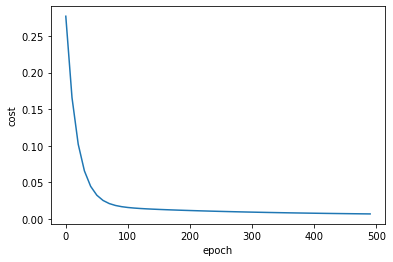

In [22]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

**Let's write predictions fn**

In [23]:
def predict(area,bedrooms,w,b):
    
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1] and bias is b
    # equation for price is w1*area + w2*bedrooms + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

128.45484403267596

## Stochastic GD

In [24]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument

0

In [28]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):                              #Only this for loop will change, rest is same as Batch GD.
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.71074912, 0.67483026]), -0.23214527149708164, 0.006397654061097663)

Compare this with weights and bias that we got using gradient descent. They both of quite similar.

**Now plot epoch vs cost graph to see how cost reduces as number of epoch increases**

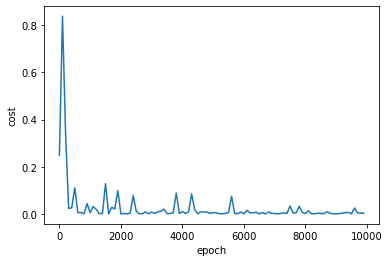

In [29]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

**Let's write predictions fn**

In [30]:
predict(2600,4,w_sgd, b_sgd) 

128.5428265458539

## Exercise

# Tensorboard

In [31]:
#Importing hand written digits dataset
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [43]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/fit", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2901 - accuracy: 0.9194
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1347 - accuracy: 0.9615
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0965 - accuracy: 0.9718
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0758 - accuracy: 0.9775
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0592 - accuracy: 0.9822


**Either run below inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`**

In [44]:
%load_ext tensorboard
%tensorboard --logdir logs/fit
#I can't run it in git bash bcz maine anaconda se tensorflow install kiya hai.
#Even inline magic use krne k bad bhi, http://localhost:6006/ is par jao to udhar bhi tensorboard khul jata hai.

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 8044), started 0:26:25 ago. (Use '!kill 8044' to kill it.)

In [38]:
model.get_weights()

[array([[-0.06249382,  0.04496406, -0.07667064, ...,  0.0111837 ,
         -0.06613314, -0.00108857],
        [ 0.0450767 , -0.01170648, -0.01557774, ...,  0.04942983,
         -0.0783024 , -0.03152717],
        [-0.05328453,  0.01327518, -0.01311813, ...,  0.01646963,
          0.00408322, -0.04431809],
        ...,
        [-0.01202703, -0.04433628,  0.00230933, ...,  0.07563503,
          0.03936337, -0.04847196],
        [ 0.02282541, -0.06554924,  0.01840674, ..., -0.01022713,
         -0.06232431,  0.05198348],
        [ 0.06061222,  0.06879833, -0.06887961, ...,  0.03125452,
         -0.04393729,  0.01556446]], dtype=float32),
 array([ 0.02983383,  0.02341669, -0.02133307, -0.03355182,  0.11030674,
         0.1264451 ,  0.11898883, -0.12473647,  0.0488423 ,  0.17191115,
         0.11975584, -0.0596888 , -0.07711849,  0.13615473,  0.07078532,
         0.01000236,  0.09528244, -0.05888939, -0.03190571,  0.20939928,
        -0.1761086 , -0.09740146,  0.2028286 ,  0.19920018,  0.116

# GPU Benchmarking

In [45]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

**Load the dataset**

In [2]:
#Loading dataset using tensorflow from keras website. 
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

Our dataset contains 60000 small training images that belongs to one of the below 10 classes

<img src="S:\Coding\Codebasics\DeepLearningML\10_gpu_benchmarking\small_images.jpg" />

0th index:Airplane, 1:Automobile, 2:Bird, 3:Cat, 4:Deer, 5:Dog, 6:Frog, 7:Horse, 8:Sheep, 9:Truck

In [48]:
X_train.shape

(50000, 32, 32, 3)

In [49]:
y_train.shape

(50000, 1)

In [63]:
y_train[0]
#6th index means Frog. ie X_train[0] contains photo of frog, therefore o/p of y_train[0] is 6 ie 6th index.

array([6], dtype=uint8)

**Data Visualization**

In [50]:
#Fn to visualize our data/image using matplotlib
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])      #imshow is image show fn.

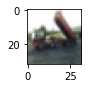

In [61]:
plot_sample(2)
#ie visualizing X_train[2]

In [10]:
#Defining classes
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [62]:
y_train[2]
#o/p will be an array

array([9], dtype=uint8)

In [66]:
classes[y_train[2][0]]
#we use classes when we don't want array,we want first element.
#Ghanta samaz nhi aaya ye line ka kya matlab hota hai. aur ye [0] q laga rahe hai?
#Does this mean ki y_train[2] iska jo o/p aayega usse associated classes[0] me jo likha hai wo o/p me de do.
#y_train[2] ka o/p 9 hai n classes[0] me 9th index pe 'truck' hai. Therefore o/p is truck?

'truck'

**Preprocessing: Scale images**

In [3]:
#why 255?: Bcz RGB values are in range 0-255.
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [76]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

We want to do OneHotEncoding, y_train[0] is 6. We will create an array of size 10, where 6th element will be 1 and remaining will be 0. 
<p> For doing that, we will use api: keras.utils.to_categorical. 
<p> Num_classes will be 10, bcz in dataset we have 10 types images classes or o/p classification.

In [4]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [77]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

**Model building and training**

In [6]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(2500, activation='relu'),
        keras.layers.Dense(2000, activation='relu'),
        keras.layers.Dense(1500, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    #For classification type, sigmoid activation fn works better.
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',    #When y is OneHotEncoded vectore, we use categorical_crossentropy. If y is a numeric values(ie y=8), we use sparse_categorical_crossentropy.
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 445s 285ms/step - loss: 1.8933 - accuracy: 0.3177
Epoch 2/5
1563/1563 [==============================] - 486s 311ms/step - loss: 1.6584 - accuracy: 0.4113
Epoch 3/5
1563/1563 [==============================] - 507s 324ms/step - loss: 1.5587 - accuracy: 0.4458
Epoch 4/5
1563/1563 [==============================] - 511s 327ms/step - loss: 1.4841 - accuracy: 0.4694
Epoch 5/5
1563/1563 [==============================] - 524s 335ms/step - loss: 1.4263 - accuracy: 0.4934


**Let's Predict**

In [8]:
y_test[0]

array([3], dtype=uint8)

In [11]:
classes[y_test[0][0]]

'cat'

Our model also should give o/p as cat

In [81]:
model.predict(X_test_scaled)[0]
#o/p: probablity of all classes

5

In [12]:
np.argmax(model.predict(X_test_scaled)[0])
#It will give max. of probable classes

6

In [13]:
classes(np.argmax(model.predict(X_test_scaled)[0]))

TypeError: 'list' object is not callable

In [14]:
#To calculate accuracy of model
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 29s 93ms/step - loss: 1.4296 - accuracy: 0.4896


[1.4296354055404663, 0.4896000027656555]

# Customer churn prediction using ANN

Customer churn prediction is to measure why customers are leaving a business.

## Data cleaning and model building

In [11]:
df = pd.read_csv('S:/Coding/Codebasics/DeepLearningML/11_chrun_prediction/customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
#Dropping customerID column as it is of no use.
df.drop('customerID', axis='columns', inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Data type of TotalCharges column should be float but it is an object. Let's change it to float.

In [16]:
#Changing object into float
pd.to_numeric(df.TotalCharges) #It's not working, bcz some of entries in the column aren't numbers but blank strings.

ValueError: Unable to parse string " " at position 488

In [17]:
#For finding out blank strings
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

Those blank strings are somewhere in between. So we supply above code line in DF and it will serve as an index. so, wherever the value is set to True it will show that row.

In [18]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [24]:
#For dropping above rows who have blank strings in them.
df1 = df[df.TotalCharges!=' ']
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [27]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [29]:
df1.TotalCharges.dtypes
#Done!

dtype('float64')

In [39]:
#To know who aren't leaving.
df1[df1.Churn == 'No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [35]:
#To know the tenure of those who aren't leaving.
tenure_churn_no = df1[df1.Churn == 'No'].tenure

In [37]:
#To know the tenure of those who are leaving.
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

**Data Visualization**

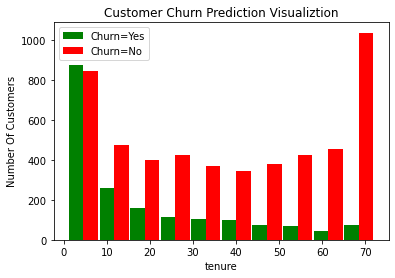

In [41]:
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

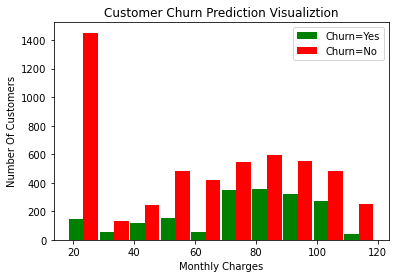

In [42]:
#Similar plot for Monthly charges v/s churn=Yes/No
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

**Many of the columns are yes, no etc. Let's print unique values in object columns to see data values**

In [43]:
def print_unique_col_values(df):     
       for column in df:                       #For loop will do our job, but we put our for loop in fn bcz we will be using this for loop many times, so for sake of convinience we put it in fn.
            if df[column].dtypes=='object':    #bcz wee want only object dtype columns (ie columns which have categorical data in it), we don't want columns which have numerical values in it.
                print(f'{column}: {df[column].unique()}')  #print(df.[column].unique()) will do our job, but to know what values are from which column for that we used f-string

In [44]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Some of the columns have no internet service or no phone service, that can be replaced with a simple No**

In [46]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No',  inplace=True)

In [47]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [52]:
#Converting Yes/No into 1/0.
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
#We have these many columns with Yes/No. No let's replace it with 1/0

for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [50]:
#Now again printing unique values
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [53]:
#Same thing for gender column
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

**One hot encoding for categorical columns** who have more than 2 entries.

In [54]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [55]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1640,1,0,1,1,7,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4324,0,0,0,0,40,1,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
4689,1,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
870,1,0,1,0,72,1,1,1,0,1,...,0,1,0,0,0,1,1,0,0,0
3420,1,0,0,0,26,1,1,1,1,0,...,1,0,0,1,0,0,1,0,0,0


In [56]:
#Scaling few columns
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [59]:
df2.sample()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3178,0,0,1,0,0.71831,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0


In [57]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

**Train test split**

In [60]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [62]:
X_train.shape
#Therefore input_shape will be(26,)

(5625, 26)

In [61]:
len(X_train.columns)

26

**Build a model (ANN) in tensorflow/keras**

In [63]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
 ])

model.compile(optimizer='adam',                 #No thumb rule for selecting optimizer. Keep experimenting diff optimizers.
              loss='binary_crossentropy',       #binary_crossentropy: bcz o/p is binary ie 0/1
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 1ms/step - loss: 0.5169 - accuracy: 0.7492
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4337 - accuracy: 0.7968
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4220 - accuracy: 0.8011
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4177 - accuracy: 0.8016
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4157 - accuracy: 0.8032
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4137 - accuracy: 0.8046
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4120 - accuracy: 0.8064
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4112 - accuracy: 0.8057
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8039
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4081 - accura

Epoch 81/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3851 - accuracy: 0.8194
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3853 - accuracy: 0.8194
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3847 - accuracy: 0.8204
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3848 - accuracy: 0.8187
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3848 - accuracy: 0.8206
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3847 - accuracy: 0.8220
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3842 - accuracy: 0.8206
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3842 - accuracy: 0.8219
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3837 - accuracy: 0.8188
Epoch 90/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3852

In [64]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4554 - accuracy: 0.7882


[0.4553770422935486, 0.7882018685340881]

In [65]:
y_predicted = model.predict(X_test)
y_predicted[:5]

array([[0.21481493],
       [0.41791457],
       [0.00835472],
       [0.81359065],
       [0.5040637 ]], dtype=float32)

In [66]:
#Converting 2D array into 1D. And Converting vlaues >0.5 into 1 and <0.5 into 0.
y_pred = []    #What is this?
for element in y_predicted:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [67]:
y_pred[:5]

[0, 0, 0, 1, 1]

In [69]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [70]:
#For printing classification report
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       999
           1       0.66      0.56      0.61       408

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(69.0, 0.5, 'Truth')

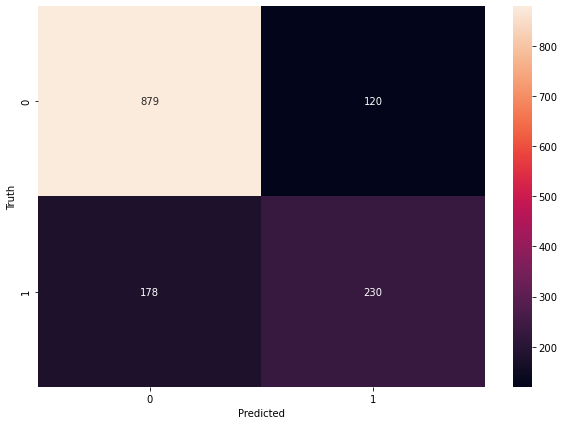

In [71]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [73]:
#Accuracy
round((879+230)/(879+230+120+178),2)    #Rounding upto 2 decimals

0.79

In [74]:
#Precision for 0 class. i.e. Precision for customers who did not churn
round(879/(879+178),2)

0.83

In [75]:
#Precision for 1 class. i.e. Precision for customers who actually churned
round(230/(230+120),2)

0.66

In [76]:
#Recall for 0 class
round(879/(879+120),2)

0.88

In [78]:
#Recall for 1 class
round(230/(230+178),2)

0.56

## Exercise

Go to video description for link of dataset. Or go to code file in S:coding/codebasics?deeplearningDL

# Precision, Recall, F1 Score

In [15]:
from sklearn.metrics import confusion_matrix , classification_report

In [17]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

In [18]:
truth =      ["Dog","Not a dog","Dog","Dog",      "Dog", "Not a dog", "Not a dog", "Dog",       "Dog", "Not a dog"]
prediction = ["Dog","Dog",      "Dog","Not a dog","Dog", "Not a dog", "Dog",       "Not a dog", "Dog", "Dog"]

In [24]:
cm = confusion_matrix(truth,prediction)
print_confusion_matrix(cm,["Dog","Not a dog"])
#Dekh lena yaar kya hai

NameError: name 'sns' is not defined

<Figure size 720x504 with 0 Axes>

In [21]:
print(classification_report(truth, prediction))

              precision    recall  f1-score   support

         Dog       0.57      0.67      0.62         6
   Not a dog       0.33      0.25      0.29         4

    accuracy                           0.50        10
   macro avg       0.45      0.46      0.45        10
weighted avg       0.48      0.50      0.48        10



In [22]:
f1_score_for_Dog_class = 2*(0.57*0.67/(0.57+0.67))
f1_score_for_Dog_class

0.6159677419354839

In [23]:
f1_score_for_Not_a_Dog_class = 2*(0.33*0.25/(0.33+0.25))
f1_score_for_Not_a_Dog_class

0.2844827586206896

# Dropout Regularization in Deep Neural Network

This is a dataset that describes sonar chirp returns bouncing off different services. The 60 input variables are the strength of the returns at different angles. It is a **binary classification problem** that requires a model to differentiate rocks from metal cylinders.

In [81]:
import warnings
warnings.filterwarnings('ignore')

In [100]:
df = pd.read_csv('S:/Coding/Codebasics/DeepLearningML/13_dropout_layer/sonar_dataset.csv', header=None)
df.head()              #We use header=None, when there are no headers in file.

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [83]:
df.shape

(207, 61)

In [89]:
# check for NaN values
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [101]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [102]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [103]:
X = df.drop(60, axis=1)
y = df[60]

In [104]:
y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [107]:
#OneHotEncoding: For converting R & M into integers.
y = pd.get_dummies(y, drop_first=True)              # M --> 0 and  mR --> 1 
y.sample(5) 

,R
190,0
137,0
12,1
99,0
171,0


In [108]:
y.value_counts()

R
0    111
1     97
dtype: int64

**Train_test_split**

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [112]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
67,0.0368,0.0403,0.0317,0.0293,0.0820,0.1342,0.1161,0.0663,0.0155,0.0506,...,0.0058,0.0091,0.0160,0.0160,0.0081,0.0070,0.0135,0.0067,0.0078,0.0068
14,0.0124,0.0433,0.0604,0.0449,0.0597,0.0355,0.0531,0.0343,0.1052,0.2120,...,0.0078,0.0083,0.0057,0.0174,0.0188,0.0054,0.0114,0.0196,0.0147,0.0062
164,0.0163,0.0198,0.0202,0.0386,0.0752,0.1444,0.1487,0.1484,0.2442,0.2822,...,0.0027,0.0077,0.0026,0.0031,0.0083,0.0020,0.0084,0.0108,0.0083,0.0033
179,0.0394,0.0420,0.0446,0.0551,0.0597,0.1416,0.0956,0.0802,0.1618,0.2558,...,0.0118,0.0146,0.0040,0.0114,0.0032,0.0062,0.0101,0.0068,0.0053,0.0087
19,0.0126,0.0149,0.0641,0.1732,0.2565,0.2559,0.2947,0.4110,0.4983,0.5920,...,0.0153,0.0092,0.0035,0.0098,0.0121,0.0006,0.0181,0.0094,0.0116,0.0063


## Using Deep Learning Model without Dropout Layer

In [110]:
import tensorflow as tf
from tensorflow import keras

In [111]:
model = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 0s 1ms/step - loss: 0.7029 - accuracy: 0.4808
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.5385
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.6154
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.7179
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6431 - accuracy: 0.7179
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6248 - accuracy: 0.7308
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5948 - accuracy: 0.7115
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5655 - accuracy: 0.7308
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5112 - accuracy: 0.7949
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4794 - accuracy: 0.8013
Epoch 11/

20/20 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 84/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 85/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 86/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 87/100
20/20 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 88/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 89/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 90/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 91/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 92/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 93/100


In [119]:
#Evaluating our model on test sample.
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 1.1275 - accuracy: 0.7885


[1.1274912357330322, 0.7884615659713745]

Training Accuracy (100%) >>> Test Accuracy (78%)

In [115]:
y_pred = model.predict(X_test).reshape(-1)
print(y_pred[:5])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:5])

[3.7376085e-06 9.8896885e-01 9.9448472e-01 4.2489617e-05 1.0000000e+00]
[0. 1. 1. 0. 1.]


In [117]:
y_test[:5]

,R
186,0
155,0
165,0
200,0
58,1


In [120]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81        27
           1       0.85      0.68      0.76        25

    accuracy                           0.79        52
   macro avg       0.80      0.78      0.78        52
weighted avg       0.80      0.79      0.79        52



## Using Deep Learning Model with Dropout Layer

In [143]:
modeld = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dropout(0.5),                  #For dropping 50% of layers
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

modeld.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

modeld.fit(X_train, y_train, epochs=100, batch_size=8)

#Everytime we run this code, it will drop any random layers & therfore accuracy will vary.

Epoch 1/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5192
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7287 - accuracy: 0.4936
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5128
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5769
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.5128
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.5513
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.5128
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7059 - accuracy: 0.5000
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7075 - accuracy: 0.5256
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.5897
Epoch 11/

20/20 [==============================] - 0s 3ms/step - loss: 0.3375 - accuracy: 0.8654
Epoch 84/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3227 - accuracy: 0.8590
Epoch 85/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3170 - accuracy: 0.8654
Epoch 86/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3283 - accuracy: 0.8526
Epoch 87/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3415 - accuracy: 0.8654
Epoch 88/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3611 - accuracy: 0.8782
Epoch 89/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.8654
Epoch 90/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3415 - accuracy: 0.8654
Epoch 91/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2840 - accuracy: 0.8846
Epoch 92/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3100 - accuracy: 0.8846
Epoch 93/100


In [147]:
modeld.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.4363 - accuracy: 0.8077


[0.4362660050392151, 0.807692289352417]

Training Accuracy is still good but Test Accuracy Improved. And we care only about Test Accuracy.

In [145]:
y_pred = modeld.predict(X_test).reshape(-1)
print(y_pred[:5])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:5])

[2.6717782e-04 7.0818704e-01 8.9862621e-01 1.8772304e-02 9.9811184e-01]
[0. 1. 1. 0. 1.]


In [146]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83        27
           1       0.89      0.68      0.77        25

    accuracy                           0.81        52
   macro avg       0.83      0.80      0.80        52
weighted avg       0.82      0.81      0.80        52



**You can see that by using dropout layer test accuracy increased from 0.79 to 0.81**

# Handling imbalanced dataset

We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model.
We will then handle imbalance in data using various techniques and improve f1-score

**We copy paste our code from Customer churn prediction code, we changed our model building a little bit** <p> We put our model in fn called ANN and we added weights parameter in our model which is used to tackle imbalance. But weight parameter didn't help us in improving our F1 score of our model. Refer code line before diff methods begin.

In [2]:
import warnings
warnings.filterwarnings('ignore')

**Load the data**

In [5]:
df = pd.read_csv('S:/Coding/Codebasics/DeepLearningML/11_chrun_prediction/customer_churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1101,4712-UYOOI,Female,0,Yes,Yes,20,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20.00,417.65,No
1992,3365-SAIGS,Female,0,No,No,17,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.55,1329.15,No
6828,2005-DWQZJ,Female,0,Yes,Yes,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.05,201.7,No
3879,7359-PTSXY,Male,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,45.75,45.75,Yes
3773,8260-NGFNY,Female,0,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,25.20,25.2,Yes


**First of all, drop customerID column as it is of no use**

In [8]:
df.drop('customerID',axis='columns',inplace=True)

In [9]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Data type of TotalCharges column should be float but it is an object. Let's change it to float.

In [49]:
#For finding out blank strings
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

Those blank strings are somewhere in between. So we supply above code line in DF and it will serve as an index. so, wherever the value is set to True it will show that row.

In [50]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [51]:
#For dropping above rows who have blank strings in them.
df1 = df[df.TotalCharges!=' ']
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [18]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [52]:
df1.TotalCharges.values
#Done!

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [20]:
#To know who aren't leaving.
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


**Data Visualization**

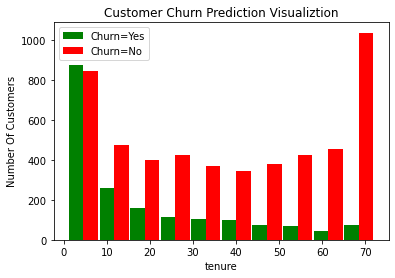

In [21]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

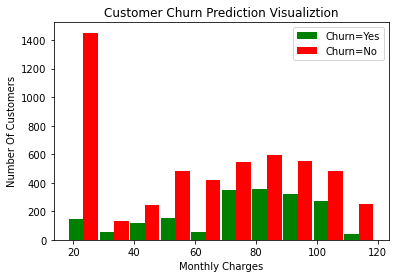

In [22]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

**Many of the columns are yes, no etc. Let's print unique values in object columns to see data values**

In [53]:
def print_unique_col_values(df):     
       for column in df:                       #For loop will do our job, but we put our for loop in fn bcz we will be using this for loop many times, so for sake of convinience we put it in fn.
            if df[column].dtypes=='object':    #bcz wee want only object dtype columns (ie columns which have categorical data in it), we don't want columns which have numerical values in it.
                print(f'{column}: {df[column].unique()}')  #print(df.[column].unique()) will do our job, but to know what values are from which column for that we used f-string

In [24]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Some of the columns have no internet service or no phone service, that can be replaced with a simple No**

In [25]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [26]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Convert Yes and No to 1 or 0**

In [54]:
#Converting Yes/No into 1/0.
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
#We have these many columns with Yes/No. No let's replace it with 1/0

for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [55]:
#Now again printing unique values
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: ['No phone service' 0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1 'No internet service']
OnlineBackup: [1 0 'No internet service']
DeviceProtection: [0 1 'No internet service']
TechSupport: [0 1 'No internet service']
StreamingTV: [0 1 'No internet service']
StreamingMovies: [0 1 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: [0 1]


In [56]:
#Same thing for gender column
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

**One hot encoding for categorical columns** who have more than 2 entries.

In [31]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [32]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6658,0,1,0,0,27,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
6993,1,1,1,0,50,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
439,0,0,0,0,1,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
3860,0,0,0,1,19,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2906,1,0,1,1,6,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [33]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [57]:
#Scaling few columns
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [58]:
df2.sample()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
183,0,0,1,1,0.450704,1,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0


In [35]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

**Train test split**

In [36]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [59]:
X_train.shape
#Therefore input_shape will be(26,)

(5625, 26)

In [60]:
len(X_train.columns)

26

**Build a model (ANN) in tensorflow/keras**

In [61]:
from tensorflow_addons import losses

ModuleNotFoundError: No module named 'tensorflow_addons'

In [48]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [49]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [50]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4940 - accuracy: 0.7593
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4263 - accuracy: 0.7988
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.7984
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4177 - accuracy: 0.7995
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8041
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4113 - accuracy: 0.8060
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4088 - accuracy: 0.8080
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4075 - accuracy: 0.8064
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4058 - accuracy: 0.8059
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4047 - accura

## Mitigating Skewdness of Data

### Method 1: Undersampling

reference: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [51]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [52]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
1    1869
0    1869
Name: Churn, dtype: int64


In [53]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [54]:
# Number of classes in training Data
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

**Printing Classification in the last, Scroll down till the last epoch to watch the classification report**

In [55]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5709 - accuracy: 0.7375
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5009 - accuracy: 0.7656
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4873 - accuracy: 0.7692
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4828 - accuracy: 0.7669
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4808 - accuracy: 0.7652
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4781 - accuracy: 0.7706
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4763 - accuracy: 0.7716
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4739 - accuracy: 0.7709
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4721 - accuracy: 0.7759
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4717 - accuracy: 0.7736
Epoch 11/

94/94 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.8161
Epoch 84/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3908 - accuracy: 0.8201
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8191
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3885 - accuracy: 0.8184
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3921 - accuracy: 0.8174
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3883 - accuracy: 0.8204
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3863 - accuracy: 0.8234
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3856 - accuracy: 0.8231
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3846 - accuracy: 0.8204
Epoch 92/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3847 - accuracy: 0.8211
Epoch 93/100


Check classification report above. f1-score for minority class 1 improved from **0.57 to 0.76**. Score for class 0 reduced to 0.75 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

### Method2: Oversampling

In [56]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
1    5163
0    5163
Name: Churn, dtype: int64


In [57]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [58]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [59]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 0s 1ms/step - loss: 0.5655 - accuracy: 0.7068
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4985 - accuracy: 0.7529
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4913 - accuracy: 0.7607
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4854 - accuracy: 0.7650
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4814 - accuracy: 0.7655
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4787 - accuracy: 0.7688
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4769 - accuracy: 0.7703
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4742 - accuracy: 0.7714
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4717 - accuracy: 0.7703
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4693 - accura

Check classification report above. f1-score for minority class 1 improved from **0.57 to 0.76**. Score for class 0 reduced to 0.75 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

### Method3: SMOTE

To install imbalanced-learn library use **pip install imbalanced-learn** command

In [60]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [61]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [63]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [64]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 0s 1ms/step - loss: 0.5222 - accuracy: 0.7470
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4716 - accuracy: 0.7712
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4627 - accuracy: 0.7798
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4552 - accuracy: 0.7824
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4518 - accuracy: 0.7852
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4472 - accuracy: 0.7860
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.7904
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4396 - accuracy: 0.7953
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4367 - accuracy: 0.7944
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4350 - accura

SMOT Oversampling increases f1 score of minority class 1 from **0.57 to 0.81 (huge improvement)** Also over all accuracy improves from 0.78 to 0.80

### Method4: Use of Ensemble with undersampling

In [65]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [66]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [68]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

model1 --> class1(1495) + class0(0, 1495)

model2 --> class1(1495) + class0(1496, 2990)

model3 --> class1(1495) + class0(2990, 4130)

In [73]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [74]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [75]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [76]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train    

In [77]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5840 - accuracy: 0.7164
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5094 - accuracy: 0.7542
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4964 - accuracy: 0.7656
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4893 - accuracy: 0.7649
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4844 - accuracy: 0.7672
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4817 - accuracy: 0.7689
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4767 - accuracy: 0.7719
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4758 - accuracy: 0.7722
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4733 - accuracy: 0.7753
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4702 - accuracy: 0.7753
Epoch 11/

94/94 [==============================] - 0s 1ms/step - loss: 0.3921 - accuracy: 0.8244
Epoch 84/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3879 - accuracy: 0.8247
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3908 - accuracy: 0.8284
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3880 - accuracy: 0.8221
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3894 - accuracy: 0.8258
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3862 - accuracy: 0.8271
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3881 - accuracy: 0.8284
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3843 - accuracy: 0.8268
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3847 - accuracy: 0.8268
Epoch 92/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3865 - accuracy: 0.8268
Epoch 93/100


In [78]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.6486 - accuracy: 0.6328
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5236 - accuracy: 0.7522
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5005 - accuracy: 0.7572
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4935 - accuracy: 0.7592
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4883 - accuracy: 0.7562
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.7605
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4795 - accuracy: 0.7625
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4778 - accuracy: 0.7642
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.7659
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4719 - accuracy: 0.7692
Epoch 11/

94/94 [==============================] - 0s 1ms/step - loss: 0.3779 - accuracy: 0.8227
Epoch 84/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3769 - accuracy: 0.8221
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3758 - accuracy: 0.8281
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3749 - accuracy: 0.8308
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3730 - accuracy: 0.8258
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3737 - accuracy: 0.8231
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3789 - accuracy: 0.8227
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3718 - accuracy: 0.8318
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3700 - accuracy: 0.8284
Epoch 92/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3703 - accuracy: 0.8268
Epoch 93/100


In [79]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6392 - accuracy: 0.6676
Epoch 2/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5260 - accuracy: 0.7609
Epoch 3/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4914 - accuracy: 0.7674
Epoch 4/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.7715
Epoch 5/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4793 - accuracy: 0.7738
Epoch 6/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4751 - accuracy: 0.7787
Epoch 7/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4736 - accuracy: 0.7731
Epoch 8/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4708 - accuracy: 0.7818
Epoch 9/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4700 - accuracy: 0.7772
Epoch 10/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4679 - accuracy: 0.7810
Epoch 11/

83/83 [==============================] - 0s 1ms/step - loss: 0.3709 - accuracy: 0.8357
Epoch 84/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3704 - accuracy: 0.8387
Epoch 85/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3687 - accuracy: 0.8391
Epoch 86/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3675 - accuracy: 0.8444
Epoch 87/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3649 - accuracy: 0.8410
Epoch 88/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3669 - accuracy: 0.8440
Epoch 89/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3677 - accuracy: 0.8387
Epoch 90/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3633 - accuracy: 0.8459
Epoch 91/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3626 - accuracy: 0.8463
Epoch 92/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3614 - accuracy: 0.8433
Epoch 93/100


In [80]:
len(y_pred1)

1407

In [81]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [82]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.88      0.69      0.77      1033
           1       0.46      0.75      0.57       374

    accuracy                           0.70      1407
   macro avg       0.67      0.72      0.67      1407
weighted avg       0.77      0.70      0.72      1407



f1-score for minority class 1 improved to 0.62 from 0.57. The score for majority class 0 is suffering and reduced to 0.80 from 0.85 but at least there is some balance in terms of prediction accuracy across two classes

# Image classification using CNN

we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

<img src="S:\Coding\Codebasics\DeepLearningML\16_cnn_cifar10_small_image_classification\small_images.jpg" />

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

**<p style="color:purple">Load the dataset</p>**

In [22]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [23]:
y_train.shape

(50000, 1)

In [19]:
y_train[:2]

array([[6],
       [9]], dtype=uint8)

Converting 2D array into 1D array, bcz for our classification having 1D array is good enough.

In [27]:
y_train = y_train.reshape(-1,)   #we used -1 bcz we don't want to change our 1st dimension(ie 50000)

In [26]:
y_train[:2]

array([6, 9], dtype=uint8)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [28]:
classes[9]

'truck'

In [9]:
#Plotting images
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

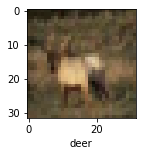

In [30]:
plot_sample(X_train, y_train, 3)

In [31]:
#Normalizing the training data
X_train = X_train / 255.0
X_test = X_test / 255.0

## Build simple ANN for image classification

In [52]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',   #Y isn't OneHotEncoded vector, Y is a numeric values. Therefore we used sparse_categorical_crossentropy
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 150s 96ms/step - loss: 1.8618 - accuracy: 0.3353
Epoch 2/5
1563/1563 [==============================] - 182s 116ms/step - loss: 1.6594 - accuracy: 0.4137
Epoch 3/5
1563/1563 [==============================] - 196s 125ms/step - loss: 1.5703 - accuracy: 0.4427
Epoch 4/5
1563/1563 [==============================] - 199s 128ms/step - loss: 1.5082 - accuracy: 0.4701
Epoch 5/5
1563/1563 [==============================] - 235s 150ms/step - loss: 1.4597 - accuracy: 0.4835


Accuracy on training sample is 48.65%

In [33]:
#Evaluating accuracy on test sample
ann.evaluate(X_test, y_test)

313/313 [==============================] - 15s 48ms/step - loss: 1.6089 - accuracy: 0.4374


[1.6089102029800415, 0.4374000132083893]

In [49]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

In [54]:
y_pred = ann.predict(X_test)                                  #Predicting for X_test using ann.
y_pred_classes = [np.argmax(element) for element in y_pred]   #Argmax will give index of max vlaue in the list.

In [50]:
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.44      0.61      0.51      1000
           1       0.74      0.41      0.53      1000
           2       0.40      0.28      0.33      1000
           3       0.27      0.31      0.29      1000
           4       0.40      0.37      0.38      1000
           5       0.27      0.59      0.37      1000
           6       0.51      0.52      0.51      1000
           7       0.52      0.53      0.52      1000
           8       0.74      0.40      0.52      1000
           9       0.70      0.36      0.47      1000

    accuracy                           0.44     10000
   macro avg       0.50      0.44      0.44     10000
weighted avg       0.50      0.44      0.44     10000



## Build a CNN to train our images

In [35]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)), #convolutional layer
    layers.MaxPooling2D((2, 2)),                                                               #pooling layer
    #we can choose filter of our choice & (3,3) is the size of filter.
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    #Dense network
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #softmax will noramlize probability
])

In [36]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 102s 65ms/step - loss: 1.4062 - accuracy: 0.4964
Epoch 2/10
1563/1563 [==============================] - 101s 65ms/step - loss: 1.0765 - accuracy: 0.6246
Epoch 3/10
1563/1563 [==============================] - 104s 67ms/step - loss: 0.9505 - accuracy: 0.6693
Epoch 4/10
1563/1563 [==============================] - 105s 67ms/step - loss: 0.8596 - accuracy: 0.7013
Epoch 5/10
1563/1563 [==============================] - 104s 67ms/step - loss: 0.7888 - accuracy: 0.7268
Epoch 6/10
1563/1563 [==============================] - 105s 67ms/step - loss: 0.7280 - accuracy: 0.7458
Epoch 7/10
1563/1563 [==============================] - 107s 68ms/step - loss: 0.6766 - accuracy: 0.7626
Epoch 8/10
1563/1563 [==============================] - 107s 68ms/step - loss: 0.6254 - accuracy: 0.7800
Epoch 9/10
1563/1563 [==============================] - 107s 68ms/step - loss: 0.5867 - accuracy: 0.7963
Epoch 10/10
1563/1563 [==============================] 

**With CNN, at the end 5 epochs, accuracy was at around 72.68% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [38]:
#Evaluating accuracy on test sample
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 7s 21ms/step - loss: 0.9607 - accuracy: 0.7007


[0.9606854319572449, 0.7006999850273132]

In [39]:
y_pred = cnn.predict(X_test)    #Predicting for X_test using cnn.
y_pred[:5]

array([[1.9032379e-04, 7.5322161e-05, 9.6752937e-04, 3.3846238e-01,
        4.7819409e-05, 6.5441227e-01, 6.3558080e-04, 3.3157180e-06,
        4.1600997e-03, 1.0453728e-03],
       [3.8277271e-05, 1.4540190e-03, 2.9375167e-07, 2.0152140e-08,
        1.6632612e-10, 8.8141799e-10, 1.0943109e-10, 7.1751777e-10,
        9.9096030e-01, 7.5470433e-03],
       [1.7969667e-03, 1.1518951e-01, 2.3844487e-04, 2.6306292e-04,
        8.2895865e-05, 3.2278127e-05, 6.0236953e-06, 7.3524017e-05,
        5.0830489e-01, 3.7401232e-01],
       [4.2651838e-01, 1.3418001e-03, 1.9862418e-01, 5.1268353e-03,
        6.9013326e-03, 2.7329926e-04, 5.1076169e-04, 2.0455715e-05,
        3.6047652e-01, 2.0644139e-04],
       [3.5774896e-08, 3.0713698e-05, 3.2098324e-03, 5.8892719e-03,
        2.0371062e-01, 9.8667655e-04, 7.8614628e-01, 8.8563584e-06,
        1.6887969e-05, 7.8093564e-07]], dtype=float32)

In [47]:
y_classes = [np.argmax(element) for element in y_pred] #Argmax will give index of max vlaue in the list. Eg:6.5441227e-01 is the max value in 1st list & it's index is 5.
y_classes[:5]

[5, 8, 8, 0, 6]

In [46]:
y_test = y_test.reshape(-1,)

In [41]:
#Comparing y_classes which is predicted by cnn with y_test.
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

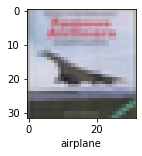

In [43]:
plot_sample(X_test, y_test,3)

In [44]:
classes[y_classes[3]]

'airplane'

In [53]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.69      0.75      1000
           1       0.84      0.78      0.81      1000
           2       0.64      0.55      0.59      1000
           3       0.60      0.37      0.46      1000
           4       0.66      0.63      0.65      1000
           5       0.59      0.66      0.62      1000
           6       0.64      0.88      0.74      1000
           7       0.74      0.77      0.75      1000
           8       0.79      0.81      0.80      1000
           9       0.69      0.86      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



## Exercise

# Data Augmentation To Address Overfitting In Flower Classification CNN

**we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc**

In below image, 4 new training samples are generated from original sample using different transformations

<img src="S:\Coding\Codebasics\DeepLearningML\17_data_augmentation\daisy2.JPG" />

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [64]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download/save our dataset. We specified "." which means current directory ie where our this notebook is located. We can specify the path instead of ".", if wee want it to be downloaded at specified path.
# untar true will unzip it
# We will get our file in folder called 'flower_photos'

228818944/228813984 [==============================] - 47s 0us/step


In [65]:
data_dir

'.\\datasets\\flower_photos'

In [73]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir
#It's similar to path. But it's windows path object.

WindowsPath('datasets/flower_photos')

In [72]:
#We want only those images which are in .jpg format. We can do this bcz of pathlib.
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [74]:
#No. of images in .jpg format
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [75]:
#glob fn is useful when we want particular flower.
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

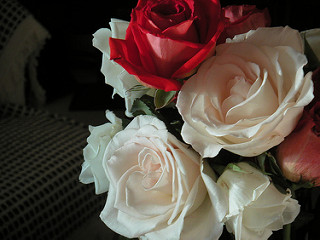

In [76]:
#PIL module is used to show images. Like this:
PIL.Image.open(str(roses[1]))

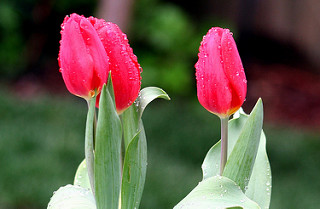

In [77]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

## Read flowers images from disk into numpy array using opencv

In [78]:
#Dictionnary of image paths of all the flowers
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [89]:
#Labels dictionary
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [80]:
#o/p: file path of 1st rose image
flowers_images_dict['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [82]:
#To get actual dtring path, ie removing WindowsPath
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [86]:
#using cv2 module to read image files into opencv object
#opencv expects string path
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape                           #it returns a 3D array

(240, 179, 3)

In [87]:
#For making dimensions of all images same
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [90]:
X, y = [], []

for flower_name, images in flowers_images_dict.items(): #Notice .items() in the end. Do we use it in case of dict?
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [91]:
X = np.array(X)
y = np.array(y)

**Train test split**

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [93]:
len(X_train)

2752

In [94]:
len(X_test)

918

In [95]:
#Scaling
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

## Build convolutional neural network and train it

In [96]:
num_classes = 5     #5: bcz we have 5 type of flowers

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
 
  #Now before dense network we will flatten our values.
  layers.Flatten(),
  layers.Dense(128, activation='relu'),   #128: we got it by trial n error
  layers.Dense(num_classes)      #We didn't specify any activatoin. Therefore Default activation:Liner activation.
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

Epoch 1/30
86/86 [==============================] - 103s 1s/step - loss: 1.3871 - accuracy: 0.4168
Epoch 2/30
86/86 [==============================] - 111s 1s/step - loss: 1.0088 - accuracy: 0.6108
Epoch 3/30
86/86 [==============================] - 113s 1s/step - loss: 0.8279 - accuracy: 0.6860
Epoch 4/30
86/86 [==============================] - 121s 1s/step - loss: 0.6469 - accuracy: 0.7551
Epoch 5/30
86/86 [==============================] - 127s 1s/step - loss: 0.4150 - accuracy: 0.8477
Epoch 6/30
86/86 [==============================] - 128s 1s/step - loss: 0.2562 - accuracy: 0.9157
Epoch 7/30
86/86 [==============================] - 135s 2s/step - loss: 0.1319 - accuracy: 0.9597
Epoch 8/30
86/86 [==============================] - 131s 2s/step - loss: 0.0748 - accuracy: 0.9793
Epoch 9/30
86/86 [==============================] - 131s 2s/step - loss: 0.0634 - accuracy: 0.9833
Epoch 10/30
86/86 [==============================] - 134s 2s/step - loss: 0.0407 - accuracy: 0.9895
Epoch 11/

In [97]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 14s 489ms/step - loss: 2.1909 - accuracy: 0.6732


[2.1908864974975586, 0.673202633857727]

**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (67.32%) indicating OVERFITTING. Let's make some predictions before we use data augmentation to address overfitting**

In [98]:
predictions = model.predict(X_test_scaled)
predictions

array([[  2.9666193 ,  21.204927  ,   9.27031   , -25.414848  ,
         -1.9924779 ],
       [  8.510468  ,   1.2424352 ,  -5.5283384 ,  -8.345722  ,
          2.4882853 ],
       [ -6.7819667 ,  -0.39290386,  17.076365  ,  -9.060265  ,
         -2.3821313 ],
       ...,
       [ -3.781313  ,  -6.223457  ,  -4.6263857 ,  10.157075  ,
          4.3273115 ],
       [  0.24720255,   4.3805304 ,   1.8198733 ,  -4.2207246 ,
         -1.6667598 ],
       [ -1.1511865 , -14.00857   ,   1.0938318 ,   7.149095  ,
          2.9431098 ]], dtype=float32)

In [99]:
#converting above numpy array into set of probabilities
score = tf.nn.softmax(predictions[0])

In [100]:
np.argmax(score)

1

In [101]:
y_test[0]

1

## Improve Test Accuracy Using Data Augmentation

In [111]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180,180,3)), #(180,180) is (height,width) of image.
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
 
])

**Original Image**

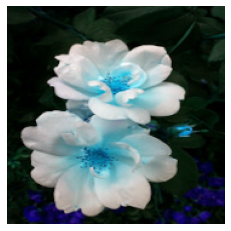

In [103]:
plt.axis('off')
plt.imshow(X[0])

**Newly generated training sample using data augmentation**

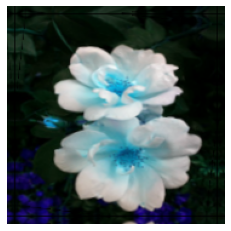

In [112]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

## Train the model using data augmentation and a drop out layer

In [113]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

Epoch 1/30
86/86 [==============================] - 110s 1s/step - loss: 1.3358 - accuracy: 0.4248
Epoch 2/30
86/86 [==============================] - 108s 1s/step - loss: 1.0766 - accuracy: 0.5509
Epoch 3/30
86/86 [==============================] - 117s 1s/step - loss: 0.9701 - accuracy: 0.6330
Epoch 4/30
86/86 [==============================] - 127s 1s/step - loss: 0.9193 - accuracy: 0.6486
Epoch 5/30
86/86 [==============================] - 123s 1s/step - loss: 0.8576 - accuracy: 0.6617
Epoch 6/30
86/86 [==============================] - 130s 2s/step - loss: 0.8224 - accuracy: 0.6926
Epoch 7/30
86/86 [==============================] - 131s 2s/step - loss: 0.7775 - accuracy: 0.7115
Epoch 8/30
86/86 [==============================] - 133s 2s/step - loss: 0.7392 - accuracy: 0.7162
Epoch 9/30
86/86 [==============================] - 131s 2s/step - loss: 0.7110 - accuracy: 0.7260
Epoch 10/30
86/86 [==============================] - 129s 2s/step - loss: 0.6722 - accuracy: 0.7471
Epoch 11/

In [114]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 10s 357ms/step - loss: 0.8964 - accuracy: 0.7233


[0.8963906168937683, 0.7233115434646606]

**You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 72.33%**

# Transfer learning in image classification

**We will use transfer learning and take pre-trained model from google's Tensorflow Hub and re-train that on flowers dataset. Using pre-trained model saves lot of time and computational budget for new classification problem at hand.**

Nhi kiya bcz ghanta kuch samaz nhi aa rha tha.